In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### Roberto Pichardo Mier 

In [3]:
datos = pd.read_csv('llegada_clientes_dataset.csv')
datos.head(5)

,tiempo_llegada
0,2024-05-01 00:03:13.023064137
1,2024-05-01 00:03:16.727134466
2,2024-05-01 00:06:34.305840969
3,2024-05-01 00:07:26.552359104
4,2024-05-01 00:07:51.113345623


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tiempo_llegada  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [5]:
datos['tiempo_llegada'] = pd.to_datetime(datos['tiempo_llegada'])

In [6]:
datos.head(5)

,tiempo_llegada
0,2024-05-01 00:03:13.023064137
1,2024-05-01 00:03:16.727134466
2,2024-05-01 00:06:34.305840969
3,2024-05-01 00:07:26.552359104
4,2024-05-01 00:07:51.113345623


In [7]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tiempo_llegada  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


In [8]:
total_llegadas = len(datos)

In [9]:
total_llegadas

1000

In [10]:
tiempo_inicial = datos['tiempo_llegada'].iloc[0]
tiempo_final = datos['tiempo_llegada'].iloc[1]

In [11]:
duracion_total = tiempo_final - tiempo_inicial
duracion_total_seconds = duracion_total.total_seconds()

In [12]:
tasa = total_llegadas / duracion_total_seconds
tasa

269.9732996406656

In [13]:
# Calcular la diferencia de tiempo entre llegadas consecutivas
diferencias_tiempo = datos['tiempo_llegada'].diff()

# Calcular el tiempo promedio entre llegadas
tiempo_promedio_entre_llegadas = diferencias_tiempo.mean()

In [15]:
var = tiempo_promedio_entre_llegadas / total_llegadas
var

Timedelta('0 days 00:00:00.086281329')

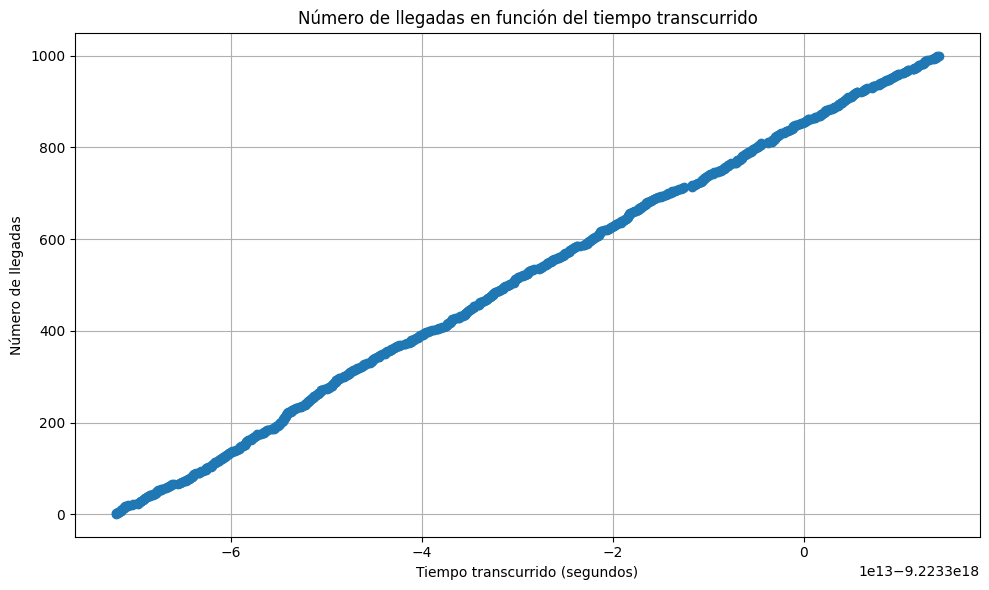

In [16]:
eje_x = diferencias_tiempo.cumsum()

# Utilizar el índice de las llegadas como el número de llegadas en el eje y
eje_y = range(1, len(datos) + 1)

# Graficar tiempos vs número de llegadas
plt.figure(figsize=(10, 6))
plt.plot(eje_x, eje_y, marker='o', linestyle='-')
plt.xlabel('Tiempo transcurrido (segundos)')
plt.ylabel('Número de llegadas')
plt.title('Número de llegadas en función del tiempo transcurrido')
plt.grid(True)
plt.tight_layout()
plt.show()